## Import Libraries

In [ ]:
import tensorflow

In [2]:
import tensorflow
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import random as rand
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
import shap
from sklearn.preprocessing import MinMaxScaler


# Bogota Zones

In [6]:
path2 = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\Bogota zones\ZAT.shp"

In [7]:
bogota_zone = gpd.read_file(path2)

In [8]:
bogota_zone = bogota_zone.to_crs(epsg=3857)

# Bogota survey data

In [3]:
path = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\Bogota_survey_final_features_2023_04_23.csv"

In [4]:
bogota_basetrips = pd.read_csv(path)

In [5]:
bogota_basetrips

,Unnamed: 0,Trip_TravelTime_Length_hour,Trip_Weekday,RoadTime,PopPerKM2_ZAT_Orig,PopPerKM2_ZAT_Dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_orig,Ind2018_perZAT_perKM2_orig,Serv2018_perZAT_perKM2_orig,...,EndTime_MorningPeak,EndTime_MorningOffPeak,EndTime_Afternoon,EndTime_EveningPeak,EndTime_Night,distance,Mode_Active,Mode_Other,Mode_Private,Mode_Transit
0,0,0.500000,1,15.570941,15732.947770,52788.514900,30.0595,681.2663,415.4123,1188.8282,...,1,0,0,0,0,9.602431,0,0,0,1
1,1,0.483333,1,13.960943,52788.514900,15732.947770,7.8866,610.4243,264.0440,509.1601,...,0,1,0,0,0,9.602431,0,0,1,0
2,2,0.483333,1,5.324356,33192.918240,15732.947770,8.6416,574.6680,399.1607,551.2121,...,0,1,0,0,0,3.504679,0,0,1,0
3,3,0.500000,1,5.306601,15732.947770,33192.918240,30.0595,681.2663,415.4123,1188.8282,...,1,0,0,0,0,3.504679,0,0,0,1
4,4,2.666667,0,15.747559,1507.511358,52788.514900,1.8667,39.1998,23.0221,67.8219,...,0,0,0,0,1,10.323526,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126742,126742,0.066667,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,0,0,0,0.000000,1,0,0,0
126743,126743,0.500000,1,68.465490,38956.975570,0.000000,2.0803,375.4875,265.5803,412.9322,...,0,0,0,1,0,21.262741,0,0,1,0
126744,126744,0.333333,0,25.439790,76363.439310,0.745046,15.4979,607.6399,330.6727,796.5300,...,0,0,1,0,0,6.757910,1,0,0,0
126745,126745,0.483333,1,0.000000,55694.526880,55694.526880,-1.0000,-1.0000,-1.0000,-1.0000,...,0,1,0,0,0,0.000000,0,1,0,0


In [6]:
bogota_basetrips  = bogota_basetrips [bogota_basetrips.Mode_Other != 1]
bogota_basetrips = bogota_basetrips.drop(['Mode_Other'], axis=1)
bogota_basetrips

,Unnamed: 0,Trip_TravelTime_Length_hour,Trip_Weekday,RoadTime,PopPerKM2_ZAT_Orig,PopPerKM2_ZAT_Dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_orig,Ind2018_perZAT_perKM2_orig,Serv2018_perZAT_perKM2_orig,...,Dest_Home,EndTime_MorningPeak,EndTime_MorningOffPeak,EndTime_Afternoon,EndTime_EveningPeak,EndTime_Night,distance,Mode_Active,Mode_Private,Mode_Transit
0,0,0.500000,1,15.570941,15732.947770,52788.514900,30.0595,681.2663,415.4123,1188.8282,...,0,1,0,0,0,0,9.602431,0,0,1
1,1,0.483333,1,13.960943,52788.514900,15732.947770,7.8866,610.4243,264.0440,509.1601,...,1,0,1,0,0,0,9.602431,0,1,0
2,2,0.483333,1,5.324356,33192.918240,15732.947770,8.6416,574.6680,399.1607,551.2121,...,1,0,1,0,0,0,3.504679,0,1,0
3,3,0.500000,1,5.306601,15732.947770,33192.918240,30.0595,681.2663,415.4123,1188.8282,...,0,1,0,0,0,0,3.504679,0,0,1
4,4,2.666667,0,15.747559,1507.511358,52788.514900,1.8667,39.1998,23.0221,67.8219,...,1,0,0,0,0,1,10.323526,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,126740,0.100000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,0,1,0,0,0.000000,1,0,0
126741,126741,0.150000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,1,0,0,0,0.000000,1,0,0
126742,126742,0.066667,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,0,1,0,0,0,0,0.000000,1,0,0
126743,126743,0.500000,1,68.465490,38956.975570,0.000000,2.0803,375.4875,265.5803,412.9322,...,0,0,0,0,1,0,21.262741,0,1,0


In [7]:
bogota_basetrips['intra_zonal_trip'] = bogota_basetrips['origin_taz'].eq(bogota_basetrips['dest_taz']).astype(int)

In [8]:
bogota_basetrips['intra_zonal_trip'].value_counts()

0    95868
1    16895
Name: intra_zonal_trip, dtype: int64

In [11]:
bogota_basetrips

,Unnamed: 0,Trip_TravelTime_Length_hour,Trip_Weekday,RoadTime,PopPerKM2_ZAT_Orig,PopPerKM2_ZAT_Dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_orig,Ind2018_perZAT_perKM2_orig,Serv2018_perZAT_perKM2_orig,...,EndTime_MorningOffPeak,EndTime_Afternoon,EndTime_EveningPeak,EndTime_Night,distance,Mode_Active,Mode_Private,Mode_Transit,intra_zonal_trip,time_diff_normalized
0,0,0.500000,1,15.570941,15732.947770,52788.514900,30.0595,681.2663,415.4123,1188.8282,...,0,0,0,0,9.602431,0,0,1,0,0.480969
1,1,0.483333,1,13.960943,52788.514900,15732.947770,7.8866,610.4243,264.0440,509.1601,...,1,0,0,0,9.602431,0,1,0,0,0.518588
2,2,0.483333,1,5.324356,33192.918240,15732.947770,8.6416,574.6680,399.1607,551.2121,...,1,0,0,0,3.504679,0,1,0,0,0.816402
3,3,0.500000,1,5.306601,15732.947770,33192.918240,30.0595,681.2663,415.4123,1188.8282,...,0,0,0,0,3.504679,0,0,1,0,0.823113
4,4,2.666667,0,15.747559,1507.511358,52788.514900,1.8667,39.1998,23.0221,67.8219,...,0,0,0,1,10.323526,0,0,1,0,0.901578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,126740,0.100000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,0,1,0,0,0.000000,1,0,0,1,1.000000
126741,126741,0.150000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,0,0,0.000000,1,0,0,1,1.000000
126742,126742,0.066667,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,0,0,0,0,0.000000,1,0,0,1,1.000000
126743,126743,0.500000,1,68.465490,38956.975570,0.000000,2.0803,375.4875,265.5803,412.9322,...,0,0,1,0,21.262741,0,1,0,0,-1.282183


In [17]:
bogota_basetrips = bogota_basetrips.sort_index(axis=1)

In [18]:
bogota_basetrips.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'Mode', 'Mode_Active', 'Mode_Private',
       'Mode_Transit', 'NSE_1 Alto', 'NSE_2 Medio-Alto', 'NSE_3 Medio',
       'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home', 'PopPerKM2_ZAT_Dest',
       'PopPerKM2_ZAT_Orig', 'RoadTime', 'Serv2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_orig', 'StartTime_Afternoon',
       'StartTime_EveningPeak', 'StartTime_MorningOffPeak',
       'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'Unnamed: 0', 'dest_taz',
       'distance', 'duration (h)', 'intra_zonal_trip',
       'num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin'

In [19]:
bogota_basetrips

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,...,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
0,7.8866,30.0595,610.4243,681.2663,0,0,0,0,1,0,...,1.577324,0.000000,0.0,0.0,7.886619,68.003435,204,12.879461,56.887527,2.0
1,30.0595,7.8866,681.2663,610.4243,1,0,0,1,0,0,...,0.000000,1.577324,0.0,0.0,68.003435,7.886619,554,56.887527,12.879461,2.0
2,30.0595,8.6416,681.2663,574.6680,1,0,0,1,0,0,...,0.000000,0.000000,0.0,0.0,68.003435,27.159389,195,56.887527,97.842970,0.0
3,8.6416,30.0595,574.6680,681.2663,0,0,0,0,1,0,...,0.000000,0.000000,0.0,0.0,27.159389,68.003435,204,97.842970,56.887527,0.0
4,7.8866,1.8667,610.4243,39.1998,1,0,0,0,0,1,...,1.577324,3.111094,0.0,0.0,7.886619,32.355379,299,12.879461,59.414404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,2.0803,2.0803,375.4875,375.4875,1,1,0,0,0,0,...,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126741,2.0803,2.0803,375.4875,375.4875,1,0,0,1,0,0,...,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126742,2.0803,2.0803,375.4875,375.4875,0,0,0,0,1,0,...,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126743,-1.0000,2.0803,-1.0000,375.4875,0,0,1,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,58.247366,699,0.007109,20.031340,-1.0


### Number of intra zonal trips

In [20]:
a = bogota_basetrips.groupby(['origin_taz', 'dest_taz']).size().to_frame().reset_index()

In [21]:
a.loc[a.origin_taz == a.dest_taz].sum()

origin_taz    418084
dest_taz      418084
0              16821
dtype: int64

In [22]:
print('Percent of intra zonal trips:')
100 * 16895 / len(bogota_basetrips)

Percent of intra zonal trips:


15.009772565742715

### correlation

df_for_corr = bogota_basetrips[['Agro2018_perZAT_perKM2_orig', 'Com2018_perZAT_perKM2_orig',
       'Ind2018_perZAT_perKM2_orig', 'Serv2018_perZAT_perKM2_orig',
       'Other2018_perZAT_perKM2_orig', 'Agro2018_perZAT_perKM2_dest',
       'Com2018_perZAT_perKM2_dest', 'Ind2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_dest', 'Other2018_perZAT_perKM2_dest']]

import seaborn as sb
corr = df_for_corr.corr()
sb.heatmap(corr, cmap="Blues", annot=True, fmt=".1f")
plt.show()



df_for_corr = bogota_basetrips[['Trip_TravelTime_Length_hour','RoadTime', 'RoadDistance', 'duration (h)', 'walkTime (h)',
       'transitTime (h)', 'waitingTime (h)', 'transfers']]

df_for_corr = df_for_corr.loc[df_for_corr.values > 0]

import seaborn as sb
corr = df_for_corr.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

sb.pairplot(df_for_corr)
plt.show()

## Split dataframe to X and y

In [24]:
#### NEW mode equivalents
y = pd.DataFrame(bogota_basetrips[['Mode_Active','Mode_Private','Mode_Transit']])
X = bogota_basetrips.drop(['Mode', 'Mode_Active','Mode_Private','Mode_Transit'],axis=1)

In [25]:
X.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
y

,Mode_Active,Mode_Private,Mode_Transit
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
126740,1,0,0
126741,1,0,0
126742,1,0,0
126743,0,1,0


In [27]:
X

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,...,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
0,7.8866,30.0595,610.4243,681.2663,0,0,0,0,1,0,...,1.577324,0.000000,0.0,0.0,7.886619,68.003435,204,12.879461,56.887527,2.0
1,30.0595,7.8866,681.2663,610.4243,1,0,0,1,0,0,...,0.000000,1.577324,0.0,0.0,68.003435,7.886619,554,56.887527,12.879461,2.0
2,30.0595,8.6416,681.2663,574.6680,1,0,0,1,0,0,...,0.000000,0.000000,0.0,0.0,68.003435,27.159389,195,56.887527,97.842970,0.0
3,8.6416,30.0595,574.6680,681.2663,0,0,0,0,1,0,...,0.000000,0.000000,0.0,0.0,27.159389,68.003435,204,97.842970,56.887527,0.0
4,7.8866,1.8667,610.4243,39.1998,1,0,0,0,0,1,...,1.577324,3.111094,0.0,0.0,7.886619,32.355379,299,12.879461,59.414404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,2.0803,2.0803,375.4875,375.4875,1,1,0,0,0,0,...,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126741,2.0803,2.0803,375.4875,375.4875,1,0,0,1,0,0,...,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126742,2.0803,2.0803,375.4875,375.4875,0,0,0,0,1,0,...,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126743,-1.0000,2.0803,-1.0000,375.4875,0,0,1,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,58.247366,699,0.007109,20.031340,-1.0


In [29]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=0) #train 80%, test 20%

In [30]:
X_train = np.asarray(X_train_.drop(['origin_taz', 'dest_taz'],axis=1))
X_test = np.asarray(X_test_.drop(['origin_taz', 'dest_taz'],axis=1))
y_train = np.asarray(y_train_)
y_test = np.asarray(y_test_)

In [31]:
# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## NN

In [32]:
def confusion_matrix(X_test, y_test):
    
    # ypred
    y_pred = model.predict(X_test)
    
    # ytrue
    y_true = np.argmax(y_test.tolist(), axis=1)

    # Define the number of classes
    num_classes = 3

    # Create an empty confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.float64)

    # Populate the confusion matrix
    for i in range(len(y_true)):
        confusion_matrix[y_true[i]] += y_pred[i]

    # Print the confusion matrix
    print('Mode_Active - Mode_Private - Mode_Transit')
    print(str(confusion_matrix.round(0)).replace("[","").replace("]",""))

## NN without hidden layers

In [153]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# Set seed value for reproducibility
np.random.seed(123)
tensorflow.random.set_seed(123)
random.seed(123)

# Define the number of input and output nodes
num_inputs = 50
num_outputs = 3

# Define the neural network model
model = Sequential()
model.add(Dense(num_outputs, activation='softmax'))

# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test))

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test)
print('Test accuracy:', scores[1])

confusion_matrix(X_test, y_test)

Epoch 1/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.9140 - accuracy: 0.5689 - val_loss: 0.8656 - val_accuracy: 0.6150
Epoch 2/20
1801/1801 [==============================] - 3s 2ms/step - loss: 0.8451 - accuracy: 0.6316 - val_loss: 0.8331 - val_accuracy: 0.6388
Epoch 3/20
1801/1801 [==============================] - 3s 2ms/step - loss: 0.8211 - accuracy: 0.6470 - val_loss: 0.8144 - val_accuracy: 0.6529
Epoch 4/20
1801/1801 [==============================] - 3s 2ms/step - loss: 0.8066 - accuracy: 0.6539 - val_loss: 0.8015 - val_accuracy: 0.6576
Epoch 5/20
1801/1801 [==============================] - 3s 2ms/step - loss: 0.7969 - accuracy: 0.6604 - val_loss: 0.7931 - val_accuracy: 0.6627
Epoch 6/20
1801/1801 [==============================] - 3s 2ms/step - loss: 0.7901 - accuracy: 0.6647 - val_loss: 0.7867 - val_accuracy: 0.6692
Epoch 7/20
1801/1801 [==============================] - 3s 2ms/step - loss: 0.7848 - accuracy: 0.6682 - val_loss: 0.7815 - val_accuracy:

## NN with hidden layers

In [33]:
X_train.shape

(90048, 44)

In [34]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
import random

# Set seed value for reproducibility
np.random.seed(123)
tensorflow.random.set_seed(123)
random.seed(123)

# Define the number of input and output nodes
num_inputs = 44
num_outputs = 3

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=num_inputs, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(num_outputs, activation='softmax'))

# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test), shuffle=True)

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test)
print('Test accuracy:', scores[1])

confusion_matrix(X_test, y_test)


Epoch 1/20
1801/1801 [==============================] - 6s 2ms/step - loss: 0.8673 - accuracy: 0.6463 - val_loss: 0.7857 - val_accuracy: 0.6908
Epoch 2/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.7775 - accuracy: 0.6929 - val_loss: 0.7489 - val_accuracy: 0.7023
Epoch 3/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.7537 - accuracy: 0.7014 - val_loss: 0.7474 - val_accuracy: 0.7017
Epoch 4/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.7385 - accuracy: 0.7064 - val_loss: 0.7272 - val_accuracy: 0.7129
Epoch 5/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.7289 - accuracy: 0.7106 - val_loss: 0.7126 - val_accuracy: 0.7175
Epoch 6/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.7220 - accuracy: 0.7136 - val_loss: 0.7110 - val_accuracy: 0.7165
Epoch 7/20
1801/1801 [==============================] - 4s 2ms/step - loss: 0.7179 - accuracy: 0.7150 - val_loss: 0.7056 - val_accuracy:

4/4 [==============================] - 0s 2ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

6675/6675 [==============================] - 8s 1ms/step


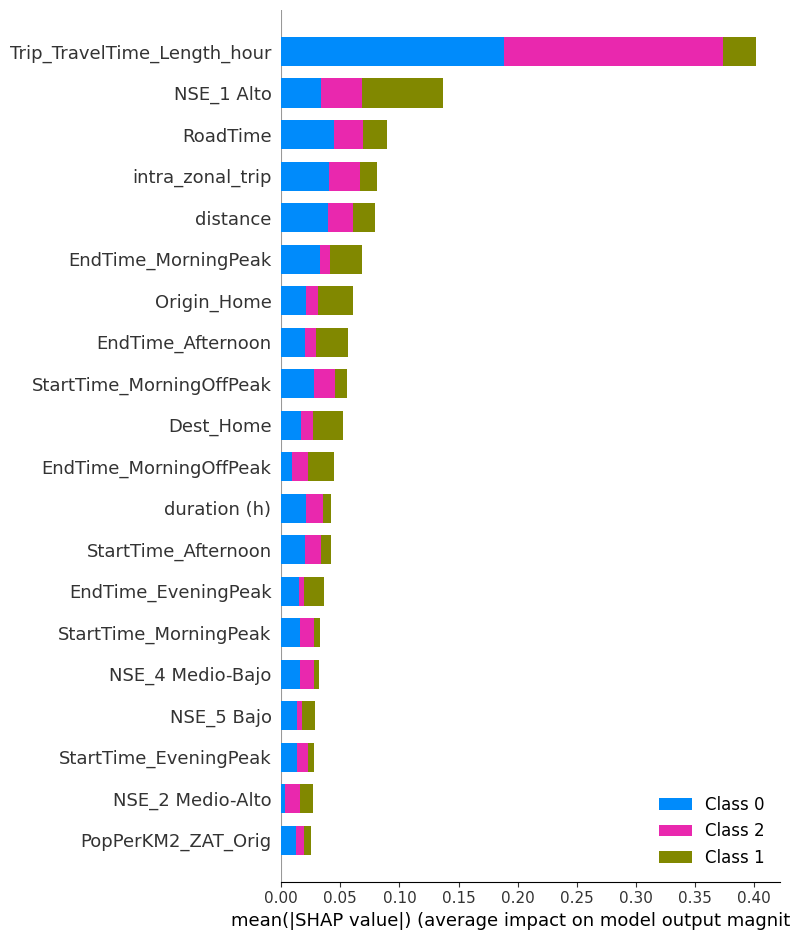

In [139]:
import shap

# Get the SHAP values for the test data
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:50])

# Visualize the SHAP values for a single instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0])

# Summarize the SHAP values for the entire dataset
shap.summary_plot(shap_values, X_test_.drop(['origin_taz', 'dest_taz'], axis=1))


4/4 [==============================] - 0s 0s/step


  0%|          | 0/50 [00:00<?, ?it/s]

6675/6675 [==============================] - 9s 1ms/step


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


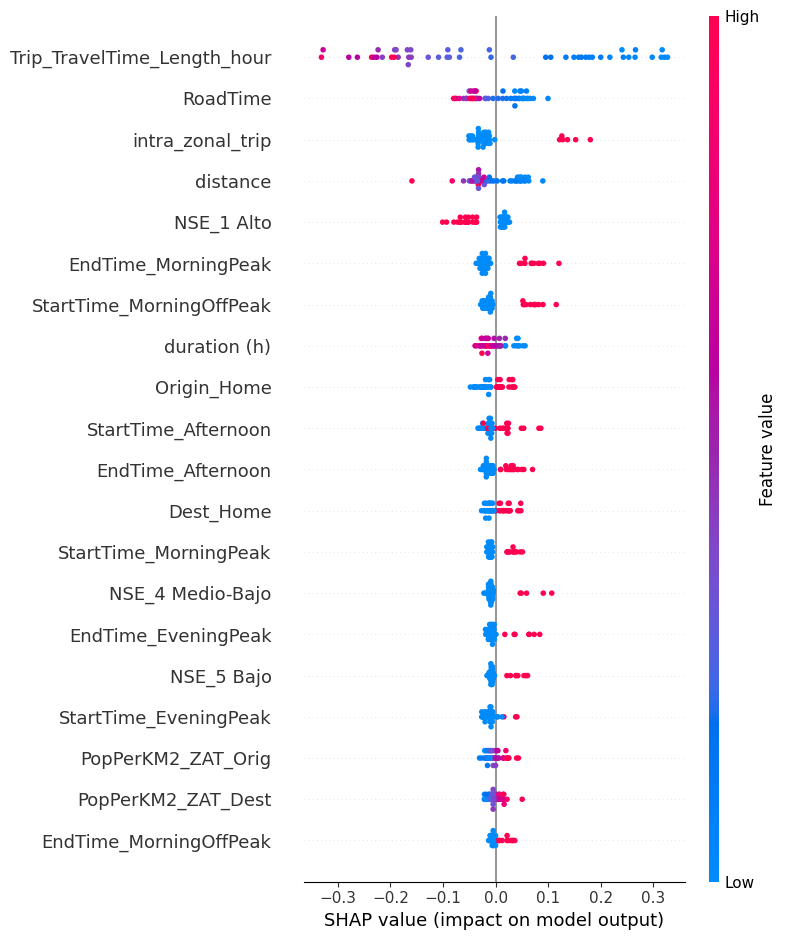

In [140]:
import shap

number_x_test = 50
active = 0

# Get the SHAP values for the test data
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:number_x_test])

# Visualize the SHAP values for a single instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0])

# Summarize the SHAP values for the entire dataset
shap.summary_plot(shap_values[active], features=X_test_.drop(['origin_taz', 'dest_taz'], axis=1)[:number_x_test],  feature_names= X_test_.drop(['origin_taz', 'dest_taz'], axis=1).columns)


4/4 [==============================] - 0s 5ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

6675/6675 [==============================] - 9s 1ms/step


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


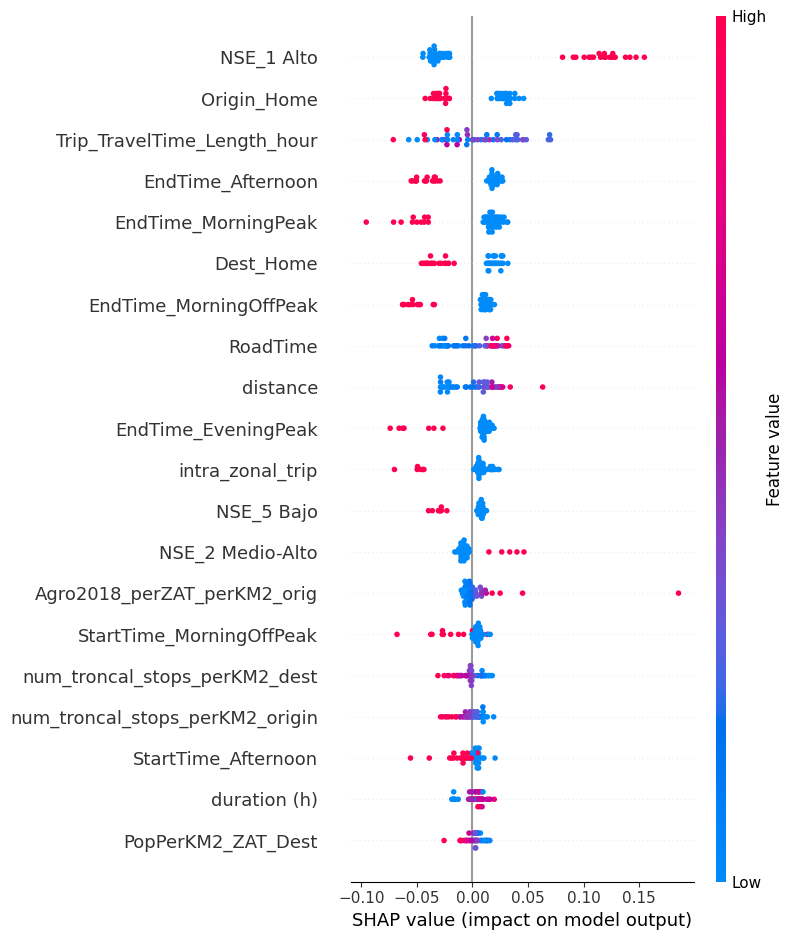

In [141]:
import shap

number_x_test = 50
private = 1

# Get the SHAP values for the test data
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:number_x_test])

# Visualize the SHAP values for a single instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0])

# Summarize the SHAP values for the entire dataset
shap.summary_plot(shap_values[private], features=X_test_.drop(['origin_taz', 'dest_taz'], axis=1)[:number_x_test],  feature_names= X_test_.drop(['origin_taz', 'dest_taz'], axis=1).columns)


4/4 [==============================] - 0s 0s/step


  0%|          | 0/50 [00:00<?, ?it/s]

6675/6675 [==============================] - 8s 1ms/step


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


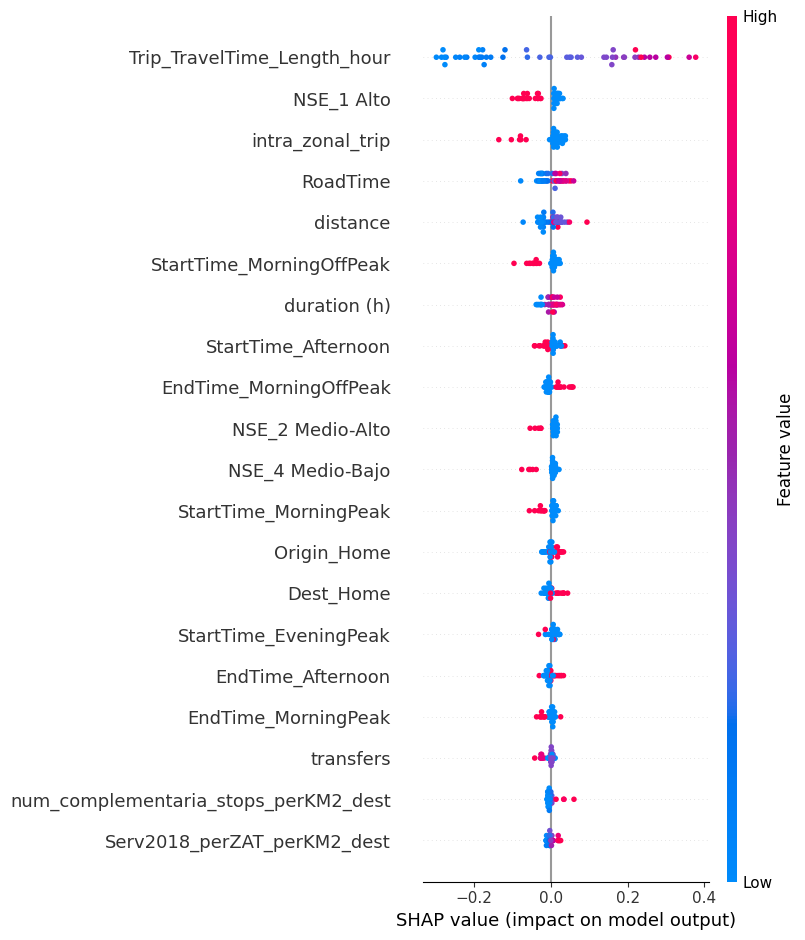

In [142]:
import shap

number_x_test = 50

transit = 2

# Get the SHAP values for the test data
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:number_x_test])

# Visualize the SHAP values for a single instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0])

# Summarize the SHAP values for the entire dataset
shap.summary_plot(shap_values[transit], features=X_test_.drop(['origin_taz', 'dest_taz'], axis=1)[:number_x_test],  feature_names= X_test_.drop(['origin_taz', 'dest_taz'], axis=1).columns)


## Confusion matrix for private mode on map

In [ ]:
y_pred = model.predict(X_train)
y_pred_df = pd.DataFrame({'Active': y_pred[:, 0], 'Private': y_pred[:, 1], 'Transit': y_pred[:, 2]})
Xy_train_2  = pd.concat([X_train_.reset_index(), y_train_.reset_index(), y_pred_df.reset_index()], axis=1, join='inner')
private_trips = Xy_train_2[Xy_train_2["Mode_Private"] == 1]
private_trips

In [ ]:
origin_private_trips = private_trips.groupby(by=["origin_taz"])["Active","Private","Transit"].sum().reset_index()
origin_private_trips_final = pd.merge(origin_private_trips , bogota_zone, left_on='origin_taz', right_on='ZAT', suffixes=('', '_origin'))
origin_private_trips_final = gpd.GeoDataFrame(origin_private_trips_final, geometry='geometry')
origin_private_trips_final = origin_private_trips_final.to_crs(epsg=3857)

dest_private_trips = private_trips.groupby(by=["dest_taz"])["Active","Private","Transit"].sum().reset_index()
dest_private_trips_final = pd.merge(dest_private_trips , bogota_zone, left_on='dest_taz', right_on='ZAT', suffixes=('', '_dest'))
dest_private_trips_final = gpd.GeoDataFrame(dest_private_trips_final, geometry='geometry')
dest_private_trips_final = dest_private_trips_final.to_crs(epsg=3857)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 8))

# First subplot: Active trips
ax = origin_private_trips_final.plot(ax=axes[0], column='Active', cmap='Reds', alpha=1, markersize=2,linewidth=0.05, edgecolor='black', legend=True, legend_kwds={'shrink': 0.3})
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_xlim(-8270000, -8235000)
ax.set_ylim(495000, 545000)
ax.add_artist(ScaleBar(1))
ax.set_axis_off()
ax.set_title("Origin, True:Private, Predicted:Active")

# Second subplot: Private trips
ax = origin_private_trips_final.plot(ax=axes[1], column='Private', cmap='Greens', alpha=1, markersize=2, linewidth=0.05, edgecolor='black', legend=True, legend_kwds={'shrink': 0.3})
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_xlim(-8270000, -8235000)
ax.set_ylim(495000, 545000)
ax.add_artist(ScaleBar(1))
ax.set_axis_off()
ax.set_title("Origin, True:Private, Predicted:Private")

# Third subplot: Transit trips
ax = origin_private_trips_final.plot(ax=axes[2], column='Transit', cmap='Reds', alpha=1, markersize=2,  linewidth=0.05,edgecolor='black', legend=True, legend_kwds={'shrink': 0.3})
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_xlim(-8270000, -8235000)
ax.set_ylim(495000, 545000)
ax.add_artist(ScaleBar(1))
ax.set_axis_off()
ax.set_title("Origin, True:Private, Predicted:Transit")

plt.show()


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 8))

# First subplot: Active trips
ax = dest_private_trips_final.plot(ax=axes[0], column='Active', cmap='Reds', alpha=1, markersize=2,linewidth=0.05, edgecolor='black', legend=True, legend_kwds={'shrink': 0.3})
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_xlim(-8270000, -8235000)
ax.set_ylim(495000, 545000)
ax.add_artist(ScaleBar(1))
ax.set_axis_off()
ax.set_title("Dest, True:Private, Predicted:Active")

# Second subplot: Private trips
ax = dest_private_trips_final.plot(ax=axes[1], column='Private', cmap='Greens', alpha=1, markersize=2, linewidth=0.05, edgecolor='black', legend=True, legend_kwds={'shrink': 0.3})
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_xlim(-8270000, -8235000)
ax.set_ylim(495000, 545000)
ax.add_artist(ScaleBar(1))
ax.set_axis_off()
ax.set_title("Dest, True:Private, Predicted:Private")

# Third subplot: Transit trips
ax = dest_private_trips_final.plot(ax=axes[2], column='Transit', cmap='Reds', alpha=1, markersize=2,  linewidth=0.05,edgecolor='black', legend=True, legend_kwds={'shrink': 0.3})
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_xlim(-8270000, -8235000)
ax.set_ylim(495000, 545000)
ax.add_artist(ScaleBar(1))
ax.set_axis_off()
ax.set_title("Dest, True:Private, Predicted:Transit")

plt.show()


## GRID SEARCH for NN

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from keras.callbacks import EarlyStopping

# Set seed value for reproducibility
np.random.seed(123)

# Define the number of input and output nodes
num_inputs = 55
num_outputs = 3

# Define the neural network model
def create_model(hidden_layers, nodes_per_layer, activation, optimizer, dropout, l2):
    print(hidden_layers, nodes_per_layer, activation, optimizer, dropout, l2)
    model = Sequential()
    model.add(Dense(nodes_per_layer, input_dim=num_inputs, activation=activation, kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dropout))
    for _ in range(hidden_layers-1):
        model.add(Dense(nodes_per_layer, activation=activation, kernel_regularizer=regularizers.l2(l2)))
        model.add(Dropout(dropout))
    model.add(Dense(num_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap Keras model with Scikit-learn API for Grid Search
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters for tuning
param_grid = {
   'hidden_layers': [3],
    'nodes_per_layer': [64],
    'activation': ['relu'],
    'optimizer': ['adam'],
    'dropout': [0.1],
    'l2': [0.001],
    'epochs': [10],
    'batch_size': [50]
}

# Define the hyperparameters for tuning
#param_grid = {
#   'hidden_layers': [1, 2, 3],
#    'nodes_per_layer': [16, 32, 64],
#    'activation': ['relu', 'sigmoid'],
#    'optimizer': ['adam', 'nadam'],
#    'dropout': [0.1, 0.2, 0.3],
#    'l2': [0.001, 0.01, 0.1],
#    'epochs': [50, 100, 150],
#    'batch_size': [100]
#}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=1)
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding evaluation metrics
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy Score: ", grid_result.best_score_)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', min_delta=0.1, patience=5)

# Define the best model using the best parameters
#best_model = create_model(**grid_result.best_params_)
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], callbacks=[early_stopping])

# Generate predictions for test data
y_pred = best_model.predict(X_test)

# Compute evaluation metrics for test data
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Print the evaluation metrics for test data
print("Test Precision Score: ", precision)
print("Test Recall Score: ", recall)
print("Test F1 Score: ", f1)
print("Test Accuracy Score: ", accuracy)
print("Confusion Matrix: ")
print(conf_matrix)


best_model = create_model(**grid_result.best_params_)
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], callbacks=[early_stopping])

### Apply the model on the GPS trace data

In [35]:
path = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\GPS_features_final.csv"
bogota_GPS = pd.read_csv(path)

In [36]:
bogota_GPS = bogota_GPS.sort_index(axis=1)
bogota_GPS

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,DestinationLat,DestinationLon,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,...,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
0,6.450,7.183,433.353,482.562,0,4.745094,-74.110470,0,0,0,...,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
1,6.450,7.183,433.353,482.562,0,4.745082,-74.110466,0,0,1,...,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
2,6.450,7.183,433.353,482.562,0,4.745284,-74.110520,1,0,0,...,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
3,6.450,7.183,433.353,482.562,0,4.745112,-74.110520,1,0,0,...,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
4,6.450,7.183,433.353,482.562,0,4.745061,-74.110480,0,0,1,...,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699010,2.353,1.360,424.780,131.908,0,4.530284,-74.081535,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0
10699011,2.353,1.360,424.780,131.908,0,4.530371,-74.081560,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0
10699012,2.353,0.993,424.780,179.316,0,4.531193,-74.080430,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,9.272112,698,0.000000,5.717046,0
10699013,10.535,0.749,1021.886,72.634,0,4.523111,-74.085420,1,0,0,...,0.0,0.0,0.0,0.0,0.000000,26.956816,693,2.244057,11.463048,0


In [37]:
pd.set_option('display.max_columns', None)
bogota_basetrips = bogota_basetrips.sort_index(axis=1)
bogota_basetrips

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,Mode,Mode_Active,Mode_Private,Mode_Transit,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,Unnamed: 0,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
0,7.8866,30.0595,610.4243,681.2663,0,0,0,0,1,0,264.0440,415.4123,Transit,0,0,1,1,0,0,0,0,1,52788.514900,15732.947770,15.570941,509.1601,1188.8282,0,0,0,1,0,0.500000,1,0,554,9.602431,1.165833,0,0.0,0.0,1.577324,0.000000,0.0,0.0,7.886619,68.003435,204,12.879461,56.887527,2.0
1,30.0595,7.8866,681.2663,610.4243,1,0,0,1,0,0,415.4123,264.0440,Private,0,1,0,1,0,0,0,0,0,15732.947770,52788.514900,13.960943,1188.8282,509.1601,0,0,1,0,0,0.483333,1,1,204,9.602431,1.009167,0,0.0,0.0,0.000000,1.577324,0.0,0.0,68.003435,7.886619,554,56.887527,12.879461,2.0
2,30.0595,8.6416,681.2663,574.6680,1,0,0,1,0,0,415.4123,399.1607,Private,0,1,0,1,0,0,0,0,0,15732.947770,33192.918240,5.324356,1188.8282,551.2121,0,0,1,0,0,0.483333,1,2,204,3.504679,0.383667,0,0.0,0.0,0.000000,0.000000,0.0,0.0,68.003435,27.159389,195,56.887527,97.842970,0.0
3,8.6416,30.0595,574.6680,681.2663,0,0,0,0,1,0,399.1607,415.4123,Transit,0,0,1,1,0,0,0,0,1,33192.918240,15732.947770,5.306601,551.2121,1188.8282,0,0,0,1,0,0.500000,1,3,195,3.504679,0.358833,0,0.0,0.0,0.000000,0.000000,0.0,0.0,27.159389,68.003435,204,97.842970,56.887527,0.0
4,7.8866,1.8667,610.4243,39.1998,1,0,0,0,0,1,264.0440,23.0221,Transit,0,0,1,0,0,0,1,0,0,52788.514900,1507.511358,15.747559,509.1601,67.8219,0,1,0,0,0,2.666667,0,4,554,10.323526,1.295833,0,0.0,0.0,1.577324,3.111094,0.0,0.0,7.886619,32.355379,299,12.879461,59.414404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,2.0803,2.0803,375.4875,375.4875,1,1,0,0,0,0,265.5803,265.5803,Active,1,0,0,0,0,0,0,1,0,38956.975570,38956.975570,0.000000,412.9322,412.9322,1,0,0,0,0,0.100000,1,126740,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126741,2.0803,2.0803,375.4875,375.4875,1,0,0,1,0,0,265.5803,265.5803,Active,1,0,0,0,0,0,0,1,0,38956.975570,38956.975570,0.000000,412.9322,412.9322,0,0,1,0,0,0.150000,1,126741,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126742,2.0803,2.0803,375.4875,375.4875,0,0,0,0,1,0,265.5803,265.5803,Active,1,0,0,0,0,0,0,1,1,38956.975570,38956.975570,0.000000,412.9322,412.9322,0,0,0,1,0,0.066667,1,126742,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126743,-1.0000,2.0803,-1.0000,375.4875,0,0,1,0,0,0,-1.0000,265.5803,Private,0,1,0,0,0,0,0,1,1,0.000000,38956.975570,68.465490,-1.0000,412.9322,0,1,0,0,0,0.500000,1,126743,796,21.262741,-1.000000,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,58.247366,699,0.007109,20.031340,-1.0


In [38]:
bogota_basetrips.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'Mode', 'Mode_Active', 'Mode_Private',
       'Mode_Transit', 'NSE_1 Alto', 'NSE_2 Medio-Alto', 'NSE_3 Medio',
       'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home', 'PopPerKM2_ZAT_Dest',
       'PopPerKM2_ZAT_Orig', 'RoadTime', 'Serv2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_orig', 'StartTime_Afternoon',
       'StartTime_EveningPeak', 'StartTime_MorningOffPeak',
       'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'Unnamed: 0', 'dest_taz',
       'distance', 'duration (h)', 'intra_zonal_trip',
       'num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin'

In [39]:
bogota_GPS.describe()

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,DestinationLat,DestinationLon,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,OriginLat,OriginLon,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,Trip_Weekend,Unnamed: 0,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
count,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,9.902973e+06,9.902973e+06,9.902973e+06,9.902973e+06,9.902973e+06,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07,1.069902e+07
mean,3.819196e+01,3.799440e+01,7.185723e+02,7.173517e+02,2.232089e-01,4.668209e+00,-7.411315e+01,2.660927e-01,1.794240e-01,1.479119e-01,1.444521e-01,1.753527e-01,4.015423e+02,4.010837e+02,3.065492e-01,2.539877e-01,1.832650e-01,1.458155e-01,1.103827e-01,4.668188e+00,-7.411326e+01,2.231943e-01,2.226581e+04,2.232099e+04,7.044908e+00,1.069877e+03,1.066606e+03,2.830896e-01,1.712655e-01,1.371364e-01,1.485514e-01,1.325538e-01,4.121422e+00,7.428271e-01,2.571729e-01,5.349507e+06,5.177759e+02,3.463205e+00,4.254054e-01,2.242388e-01,3.432102e-01,3.423763e-01,2.287080e+00,2.280878e+00,6.284790e-01,6.258702e-01,3.337290e+01,3.334441e+01,5.180143e+02,4.690253e+01,4.681569e+01,1.531781e-01
std,8.139879e+01,8.109380e+01,8.836986e+02,8.815952e+02,4.163973e-01,9.543401e-02,6.887962e-02,4.419133e-01,3.837070e-01,3.550127e-01,3.515476e-01,3.802685e-01,4.047421e+02,4.042355e+02,4.610605e-01,4.352907e-01,3.868836e-01,3.529212e-01,3.133662e-01,9.549081e-02,6.891060e-02,4.163876e-01,2.076684e+04,2.078663e+04,8.847543e+00,1.458808e+03,1.454227e+03,4.504996e-01,3.767408e-01,3.439913e-01,3.556458e-01,3.390919e-01,1.531886e+01,4.370755e-01,4.370755e-01,3.088540e+06,3.953449e+02,4.571847e+00,4.612882e-01,4.170800e-01,1.448504e+00,1.447735e+00,4.864293e+00,4.856305e+00,2.657010e+00,2.647409e+00,2.792620e+01,2.790102e+01,3.953928e+02,4.739844e+01,4.732859e+01,7.135093e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,3.826154e+00,-7.455341e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.826154e+00,-7.455341e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.853500e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
25%,4.156000e+00,4.156000e+00,2.264370e+02,2.264370e+02,0.000000e+00,4.605672e+00,-7.414716e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.397500

In [40]:
bogota_basetrips.describe()

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,Mode_Active,Mode_Private,Mode_Transit,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,Unnamed: 0,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
count,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000,112560.000000
mean,38.162410,37.657740,700.111737,697.514325,0.440912,0.309861,0.177212,0.173223,0.232214,0.084622,380.836654,379.434265,0.484915,0.203038,0.312047,0.233431,0.178962,0.151510,0.149885,0.194421,0.453953,23635.879369,23753.749691,7.683925,1058.069750,1048.634469,0.305855,0.167289,0.177541,0.232836,0.054655,0.798875,0.852443,63719.851830,560.246260,3.825479,0.191501,0.149440,0.344915,0.342959,2.611608,2.587375,0.686273,0.677224,33.290979,33.135003,560.535785,46.813385,46.514927,0.015467
std,81.510164,80.394577,944.263286,944.882405,0.496498,0.462438,0.381850,0.378442,0.422247,0.278319,420.153955,419.665937,0.499775,0.402263,0.463331,0.423016,0.383322,0.358547,0.356960,0.395756,0.497877,24470.055594,24439.224444,9.322497,1520.549295,1505.085389,0.460771,0.373235,0.382127,0.422640,0.227307,0.936532,0.354887,36554.374553,389.372438,5.271385,0.823461,0.356524,1.456390,1.448886,5.300263,5.268910,2.732963,2.724035,30.226130,30.064206,389.218171,51.089922,50.810766,0.793210
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,-1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,2.108900,2.108900,122.092900,122.092900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.320800,76.080500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9080.512778,9080.512778,1.061891,137.925100,137.925100,0.000000,0.000000,0.000000,0.000000,0.000000,0.233333,1.000000,32319.750000,276.000000,0.510142,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.198248,8.005385,276.000000,7.922309,7.903198,-1.000000
50%,11.461600,11.344500,463.500700,457.914000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.173400,281.267300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18984.564020,19045.780490,4.370566,586.940400,586.940400,0.000000,0.000000,0.000000,0.000000,0.00

# Prepare the features to be imported in the model

In [41]:
bogota_GPS_5_less = bogota_GPS.loc[bogota_GPS.Trip_TravelTime_Length_hour <= 5]

In [42]:
bogota_GPS_5_less_pos = bogota_GPS_5_less.loc[bogota_GPS_5_less.Trip_TravelTime_Length_hour >= 0]

In [43]:
bogota_GPS_final = bogota_GPS_5_less_pos.dropna()

In [44]:
bogota_basetrips.drop(['origin_taz', 'dest_taz','Unnamed: 0','OriginLat',
       'OriginLon', 'DestinationLat', 'DestinationLon','Trip_Weekend'],axis=1).columns

KeyError: "['OriginLat', 'OriginLon', 'DestinationLat', 'DestinationLon', 'Trip_Weekend'] not found in axis"

In [46]:
X_test_.drop(['origin_taz', 'dest_taz'],axis=1).columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'distance',
       'duration (h)', 'intra_zonal_trip',
       'num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin',
       'num_complementaria_stops_perKM2_dest',
       'num_complementaria_stops_perKM2

In [47]:
bogota_GPS_final.drop(['origin_taz', 'dest_taz','Unnamed: 0','OriginLat',
       'OriginLon', 'DestinationLat', 'DestinationLon','Trip_Weekend'],axis=1).columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'distance',
       'duration (h)', 'intra_zonal_trip',
       'num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin',
       'num_complementaria_stops_perKM2_dest',
       'num_complementaria_stops_perKM2

In [48]:
#bogota_GPS.drop('Unnamed: 0', axis=1, inplace=True)
X_GPS = np.asarray(bogota_GPS_final.drop(['origin_taz', 'dest_taz','Unnamed: 0','OriginLat',
       'OriginLon', 'DestinationLat', 'DestinationLon','Trip_Weekend'],axis=1))
X_GPS = scaler.transform(X_GPS)
X_GPS

array([[0.00938116, 0.01030416, 0.05522349, ..., 0.06364915, 0.04840616,
        0.2       ],
       [0.00938116, 0.01030416, 0.05522349, ..., 0.06364915, 0.04840616,
        0.2       ],
       [0.00938116, 0.01030416, 0.05522349, ..., 0.06364915, 0.04840616,
        0.2       ],
       ...,
       [0.00422215, 0.00250962, 0.05413353, ..., 0.        , 0.01387606,
        0.2       ],
       [0.01452505, 0.00220237, 0.13004938, ..., 0.00544664, 0.02782241,
        0.2       ],
       [0.01452505, 0.00297175, 0.13004938, ..., 0.00544664, 0.01868652,
        0.2       ]])

In [49]:
y_GPS = model.predict(X_GPS)
y_GPS 

259693/259693 [==============================] - 308s 1ms/step


array([[0.9237605 , 0.05048871, 0.02575075],
       [0.5990883 , 0.06330337, 0.33760828],
       [0.64300084, 0.04212097, 0.31487828],
       ...,
       [0.9457056 , 0.0404549 , 0.01383953],
       [0.8453686 , 0.1281642 , 0.02646713],
       [0.78298944, 0.17951266, 0.03749798]], dtype=float32)

In [50]:
col_sums = np.sum(y_GPS, axis=0)
print((col_sums/y_GPS.shape[0]).round(2))
print('Mode_Active - Mode_Private - Mode_Transit')

[0.43 0.25 0.31]
Mode_Active - Mode_Private - Mode_Transit


In [51]:
y.sum()/len(y)

Mode_Active     0.484915
Mode_Private    0.203038
Mode_Transit    0.312047
dtype: float64

In [52]:
y_GPS_df = pd.DataFrame({'Active': y_GPS[:, 0], 'Private': y_GPS[:, 1], 'Transit': y_GPS[:, 2]})
max_cols = y_GPS_df.idxmax(axis=1)
y_GPS_df['MODE'] = max_cols
y_GPS_df

,Active,Private,Transit,MODE
0,0.923760,0.050489,0.025751,Active
1,0.599088,0.063303,0.337608,Active
2,0.643001,0.042121,0.314878,Active
3,0.824673,0.049680,0.125647,Active
4,0.882332,0.057630,0.060038,Active
...,...,...,...,...
8310156,0.888054,0.096310,0.015635,Active
8310157,0.888271,0.096197,0.015532,Active
8310158,0.945706,0.040455,0.013840,Active
8310159,0.845369,0.128164,0.026467,Active


In [53]:
bogota_GPS_final = bogota_GPS_final.reset_index(drop=True)
bogota_GPS_final

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,DestinationLat,DestinationLon,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,OriginLat,OriginLon,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,Trip_Weekend,Unnamed: 0,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
0,6.450,7.183,433.353,482.562,0,4.745094,-74.110470,0,0,0,1,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.741007,-74.106606,1,80004.668,29485.705,0.596086,501.438,558.379,0,0,0,1,0,0.307500,1,0,0,115,0.447317,0.177222,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
1,6.450,7.183,433.353,482.562,0,4.745082,-74.110466,0,0,1,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740927,-74.106530,1,80004.668,29485.705,0.600653,501.438,558.379,0,0,0,1,0,3.062222,1,0,1,115,0.455580,0.179722,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
2,6.450,7.183,433.353,482.562,0,4.745112,-74.110520,1,0,0,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740980,-74.106570,1,80004.668,29485.705,0.599897,501.438,558.379,0,0,1,0,0,4.756111,1,0,3,115,0.456885,0.178611,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
3,6.450,7.183,433.353,482.562,0,4.745061,-74.110480,0,0,1,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740964,-74.106580,1,80004.668,29485.705,0.594913,501.438,558.379,0,0,1,0,0,0.834167,1,0,4,115,0.451252,0.176667,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
4,6.450,7.183,433.353,482.562,0,4.745071,-74.110460,0,0,0,1,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740983,-74.106580,1,80004.668,29485.705,0.595799,501.438,558.379,0,0,0,1,0,0.599167,1,0,5,115,0.449035,0.177778,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310156,2.353,1.360,424.780,131.908,0,4.530284,-74.081535,0,0,0,0,1,300.444,113.096,0.0,0.0,0.0,0.0,1.0,4.529459,-74.084370,1,0.000,25221.371,0.279737,467.140,148.453,0,0,0,0,1,0.010000,0,1,10699010,697,0.316239,0.065556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0
8310157,2.353,1.360,424.780,131.908,0,4.530371,-74.081560,0,0,0,0,1,300.444,113.096,0.0,0.0,0.0,0.0,1.0,4.529420,-74.084530,1,0.000,25221.371,0.269957,467.140,148.453,0,0,0,0,1,0.008333,0,1,10699011,697,0.331519,0.060556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0
8310158,2.353,0.993,424.780,179.316,0,4.531193,-74.080430,1,0,0,0,0,300.444,126.829,0.0,0.0,0.0,0.0,1.0,4.536099,-74.080520,1,0.000,33462.048,1.191791,467.140,197.198,1,0,0,0,0,0.011667,0,1,10699012,697,0.149967,0.358333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9.272112,698,0.000000,5.717046,0
8310159,10.535,0.749,1021.886,72.634,0,4.523111,-74.085420,1,0,0,0,0,876.153,62.275,0.0,0.0,0.0,1.0,0.0,4.525525,-74.087620,0,0.000,9075.357,0.274268,1150.060,81.744,1,0,0,0,0,0.025278,0,1,10699013,695,0.255457,0.112500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26.956816,693,2.244057,11.463048,0


In [54]:
Xy_GPS  = pd.concat([bogota_GPS_final, y_GPS_df], axis=1)
Xy_GPS 

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,DestinationLat,DestinationLon,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,OriginLat,OriginLon,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,Trip_Weekend,Unnamed: 0,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers,Active,Private,Transit,MODE
0,6.450,7.183,433.353,482.562,0,4.745094,-74.110470,0,0,0,1,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.741007,-74.106606,1,80004.668,29485.705,0.596086,501.438,558.379,0,0,0,1,0,0.307500,1,0,0,115,0.447317,0.177222,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.923760,0.050489,0.025751,Active
1,6.450,7.183,433.353,482.562,0,4.745082,-74.110466,0,0,1,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740927,-74.106530,1,80004.668,29485.705,0.600653,501.438,558.379,0,0,0,1,0,3.062222,1,0,1,115,0.455580,0.179722,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.599088,0.063303,0.337608,Active
2,6.450,7.183,433.353,482.562,0,4.745112,-74.110520,1,0,0,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740980,-74.106570,1,80004.668,29485.705,0.599897,501.438,558.379,0,0,1,0,0,4.756111,1,0,3,115,0.456885,0.178611,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.643001,0.042121,0.314878,Active
3,6.450,7.183,433.353,482.562,0,4.745061,-74.110480,0,0,1,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740964,-74.106580,1,80004.668,29485.705,0.594913,501.438,558.379,0,0,1,0,0,0.834167,1,0,4,115,0.451252,0.176667,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.824673,0.049680,0.125647,Active
4,6.450,7.183,433.353,482.562,0,4.745071,-74.110460,0,0,0,1,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740983,-74.106580,1,80004.668,29485.705,0.595799,501.438,558.379,0,0,0,1,0,0.599167,1,0,5,115,0.449035,0.177778,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.882332,0.057630,0.060038,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310156,2.353,1.360,424.780,131.908,0,4.530284,-74.081535,0,0,0,0,1,300.444,113.096,0.0,0.0,0.0,0.0,1.0,4.529459,-74.084370,1,0.000,25221.371,0.279737,467.140,148.453,0,0,0,0,1,0.010000,0,1,10699010,697,0.316239,0.065556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0,0.888054,0.096310,0.015635,Active
8310157,2.353,1.360,424.780,131.908,0,4.530371,-74.081560,0,0,0,0,1,300.444,113.096,0.0,0.0,0.0,0.0,1.0,4.529420,-74.084530,1,0.000,25221.371,0.269957,467.140,148.453,0,0,0,0,1,0.008333,0,1,10699011,697,0.331519,0.060556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0,0.888271,0.096197,0.015532,Active
8310158,2.353,0.993,424.780,179.316,0,4.531193,-74.080430,1,0,0,0,0,300.444,126.829,0.0,0.0,0.0,0.0,1.0,4.536099,-74.080520,1,0.000,33462.048,1.191791,467.140,197.198,1,0,0,0,0,0.011667,0,1,10699012,697,0.149967,0.358333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9.272112,698,0.000000,5.717046,0,0.945706,0.040455,0.013840,Active
8310159,10.535,0.749,1021.886,72.634,0,4.523111,-74.085420,1,0,0,0,0,876.153,62.275,0.0,0.0

In [55]:
color_mapping = {'Active': 'red', 'Transit': 'blue', 'Private': 'green'}
Xy_GPS['color'] = Xy_GPS ['MODE'].map(color_mapping)
Xy_GPS

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,DestinationLat,DestinationLon,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,OriginLat,OriginLon,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,Trip_Weekend,Unnamed: 0,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers,Active,Private,Transit,MODE,color
0,6.450,7.183,433.353,482.562,0,4.745094,-74.110470,0,0,0,1,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.741007,-74.106606,1,80004.668,29485.705,0.596086,501.438,558.379,0,0,0,1,0,0.307500,1,0,0,115,0.447317,0.177222,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.923760,0.050489,0.025751,Active,red
1,6.450,7.183,433.353,482.562,0,4.745082,-74.110466,0,0,1,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740927,-74.106530,1,80004.668,29485.705,0.600653,501.438,558.379,0,0,0,1,0,3.062222,1,0,1,115,0.455580,0.179722,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.599088,0.063303,0.337608,Active,red
2,6.450,7.183,433.353,482.562,0,4.745112,-74.110520,1,0,0,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740980,-74.106570,1,80004.668,29485.705,0.599897,501.438,558.379,0,0,1,0,0,4.756111,1,0,3,115,0.456885,0.178611,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.643001,0.042121,0.314878,Active,red
3,6.450,7.183,433.353,482.562,0,4.745061,-74.110480,0,0,1,0,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740964,-74.106580,1,80004.668,29485.705,0.594913,501.438,558.379,0,0,1,0,0,0.834167,1,0,4,115,0.451252,0.176667,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.824673,0.049680,0.125647,Active,red
4,6.450,7.183,433.353,482.562,0,4.745071,-74.110460,0,0,0,1,0,269.711,300.338,0.0,0.0,0.0,1.0,0.0,4.740983,-74.106580,1,80004.668,29485.705,0.595799,501.438,558.379,0,0,0,1,0,0.599167,1,0,5,115,0.449035,0.177778,0,0.0,0.0,0.0,0.0,0.0,0.0,42.045283,38.307054,114,26.223945,19.943716,0,0.882332,0.057630,0.060038,Active,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310156,2.353,1.360,424.780,131.908,0,4.530284,-74.081535,0,0,0,0,1,300.444,113.096,0.0,0.0,0.0,0.0,1.0,4.529459,-74.084370,1,0.000,25221.371,0.279737,467.140,148.453,0,0,0,0,1,0.010000,0,1,10699010,697,0.316239,0.065556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0,0.888054,0.096310,0.015635,Active,red
8310157,2.353,1.360,424.780,131.908,0,4.530371,-74.081560,0,0,0,0,1,300.444,113.096,0.0,0.0,0.0,0.0,1.0,4.529420,-74.084530,1,0.000,25221.371,0.269957,467.140,148.453,0,0,0,0,1,0.008333,0,1,10699011,697,0.331519,0.060556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.278676,696,0.000000,7.698992,0,0.888271,0.096197,0.015532,Active,red
8310158,2.353,0.993,424.780,179.316,0,4.531193,-74.080430,1,0,0,0,0,300.444,126.829,0.0,0.0,0.0,0.0,1.0,4.536099,-74.080520,1,0.000,33462.048,1.191791,467.140,197.198,1,0,0,0,0,0.011667,0,1,10699012,697,0.149967,0.358333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,9.272112,698,0.000000,5.717046,0,0.945706,0.040455,0.013840,Active,red
8310159,10.535,0.749,1021.886,72.634,0,4.523111,-

To output multiple subplots, the figure containing the passed axes is being cleared.


Trip_TravelTime_Length_hour


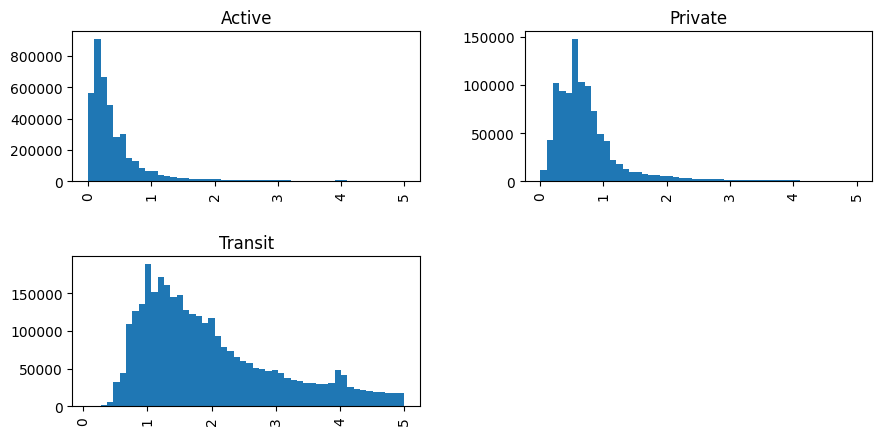

In [56]:
fig, ax = plt.subplots(1, figsize=(10,5))
Xy_GPS ['Trip_TravelTime_Length_hour'].hist(by=Xy_GPS ['MODE'],bins=50, ax=ax)
print('Trip_TravelTime_Length_hour')

In [57]:
Xy_GPS.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'DestinationLat', 'DestinationLon', 'EndTime_Afternoon',
       'EndTime_EveningPeak', 'EndTime_MorningOffPeak', 'EndTime_MorningPeak',
       'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'OriginLat',
       'OriginLon', 'Origin_Home', 'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig',
       'RoadTime', 'Serv2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_orig', 'StartTime_Afternoon',
       'StartTime_EveningPeak', 'StartTime_MorningOffPeak',
       'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'Trip_Weekend',
       'Unnamed: 0', 'dest_taz', 'distance', 'duration (h)',
       'intra_zonal_trip', 'num_alimentadores_stops_perKM2_dest',
       'num_alim

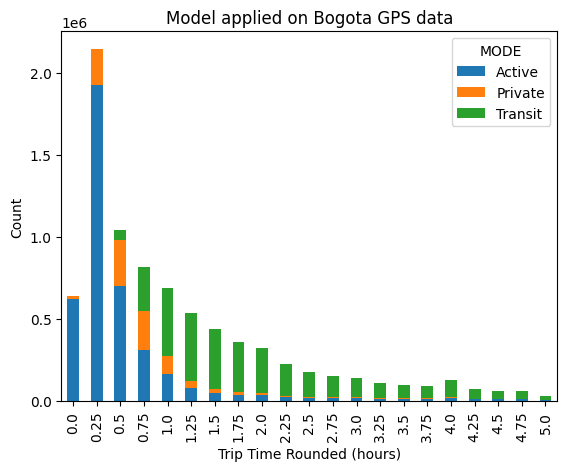

In [62]:
aa = Xy_GPS [['Trip_TravelTime_Length_hour','MODE']].copy()
aa['trip_time_rounded'] = (4 * aa['Trip_TravelTime_Length_hour']).round() / 4
bb = aa.groupby(['trip_time_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='trip_time_rounded', columns='MODE', values='Trip_TravelTime_Length_hour')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Time Rounded (hours)')
ax.set_ylabel('Count')

# Set the title of the chart
ax.set_title('Model applied on Bogota GPS data')

# Show the chart
plt.show()

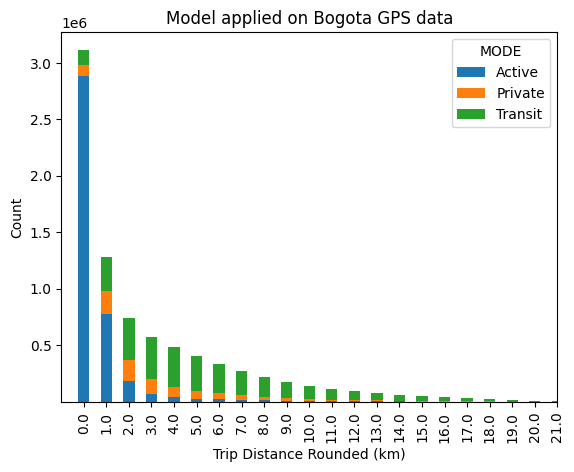

In [64]:
aa = Xy_GPS [['distance','MODE']].copy()
aa['distance_rounded'] = aa['distance'].round()
bb = aa.groupby(['distance_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='distance_rounded', columns='MODE', values='distance')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Distance Rounded (km)')
ax.set_ylabel('Count')

ax.set_xlim([-1, 21])

# Set the title of the chart
ax.set_title('Model applied on Bogota GPS data')

# Show the chart
plt.show()

In [59]:
bogota_basetrips_5_less = bogota_basetrips.loc[bogota_basetrips.Trip_TravelTime_Length_hour <= 5]

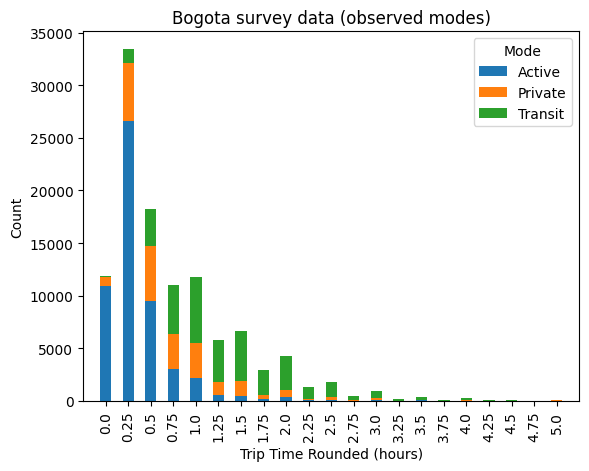

In [60]:
aa = bogota_basetrips_5_less[['Trip_TravelTime_Length_hour','Mode']].copy()
aa['trip_time_rounded'] = (4 * aa['Trip_TravelTime_Length_hour']).round() / 4
#aa['trip_time_rounded'] = aa['Trip_TravelTime_Length_hour'].round()
bb = aa.groupby(['trip_time_rounded','Mode']).count().reset_index()
# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='trip_time_rounded', columns='Mode', values='Trip_TravelTime_Length_hour')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Time Rounded (hours)')
ax.set_ylabel('Count')

# Set the title of the chart
ax.set_title('Bogota survey data (observed modes)')

# Limit the x-axis to a certain range of values
ax.set_xlim([-1, 21])

# Show the chart
plt.show()

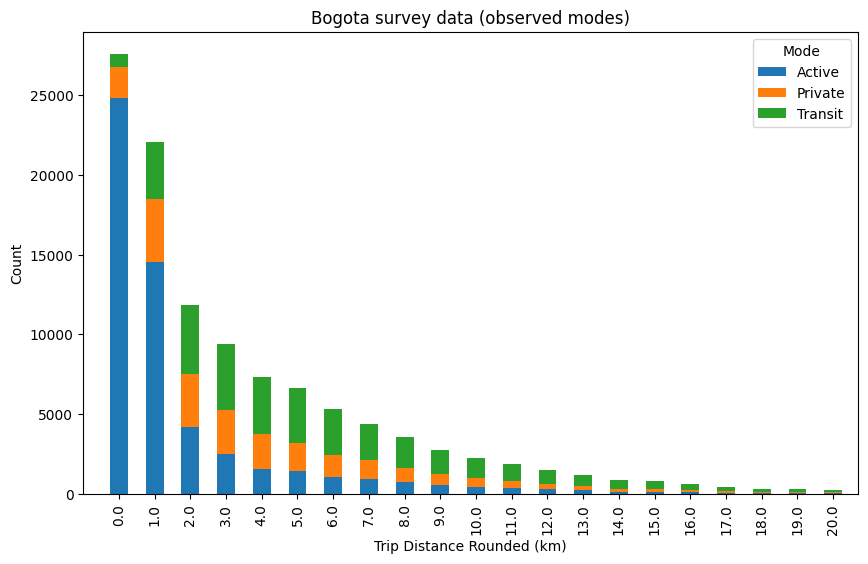

In [152]:
import matplotlib.pyplot as plt

# Copy and round the data
aa = bogota_basetrips[['distance', 'Mode']].copy()
aa['distance_rounded'] = aa['distance'].copy().round()

# Group the data and create a pivot table
bb = aa.groupby(['distance_rounded', 'Mode']).count().reset_index()
pivot_df = bb.pivot(index='distance_rounded', columns='Mode', values='distance')

# Create the stacked bar chart with figsizea
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Distance Rounded (km)')
ax.set_ylabel('Count')

# Set the title of the chart
ax.set_title('Bogota survey data (observed modes)')

# Limit the x-axis to a certain range of values
ax.set_xlim([-1, 20.7])

# Show the chart
plt.show()


In [773]:
bogota_basetrips.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'Mode', 'Mode_Active', 'Mode_Private',
       'Mode_Transit', 'NSE_1 Alto', 'NSE_2 Medio-Alto', 'NSE_3 Medio',
       'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home', 'PopPerKM2_ZAT_Dest',
       'PopPerKM2_ZAT_Orig', 'RoadTime', 'Serv2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_orig', 'StartTime_Afternoon',
       'StartTime_EveningPeak', 'StartTime_MorningOffPeak',
       'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'Unnamed: 0', 'dest_taz',
       'distance', 'duration (h)', 'intra_zonal_trip',
       'num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin'

In [346]:
Xy_GPS.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'Trip_Weekend',
       'Unnamed: 0', 'dest_taz', 'duration (h)', 'intra_zonal_trip',
       'num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin',
       'num_complementaria_stops_perKM2_dest',
       'n

## Plot stacked bar chart based on prediction on the raw data

In [95]:
X

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers
0,7.8866,30.0595,610.4243,681.2663,0,0,0,0,1,0,264.0440,415.4123,1,0,0,0,0,1,52788.514900,15732.947770,15.570941,509.1601,1188.8282,0,0,0,1,0,0.500000,1,554,9.602431,1.165833,0,0.0,0.0,1.577324,0.000000,0.0,0.0,7.886619,68.003435,204,12.879461,56.887527,2.0
1,30.0595,7.8866,681.2663,610.4243,1,0,0,1,0,0,415.4123,264.0440,1,0,0,0,0,0,15732.947770,52788.514900,13.960943,1188.8282,509.1601,0,0,1,0,0,0.483333,1,204,9.602431,1.009167,0,0.0,0.0,0.000000,1.577324,0.0,0.0,68.003435,7.886619,554,56.887527,12.879461,2.0
2,30.0595,8.6416,681.2663,574.6680,1,0,0,1,0,0,415.4123,399.1607,1,0,0,0,0,0,15732.947770,33192.918240,5.324356,1188.8282,551.2121,0,0,1,0,0,0.483333,1,204,3.504679,0.383667,0,0.0,0.0,0.000000,0.000000,0.0,0.0,68.003435,27.159389,195,56.887527,97.842970,0.0
3,8.6416,30.0595,574.6680,681.2663,0,0,0,0,1,0,399.1607,415.4123,1,0,0,0,0,1,33192.918240,15732.947770,5.306601,551.2121,1188.8282,0,0,0,1,0,0.500000,1,195,3.504679,0.358833,0,0.0,0.0,0.000000,0.000000,0.0,0.0,27.159389,68.003435,204,97.842970,56.887527,0.0
4,7.8866,1.8667,610.4243,39.1998,1,0,0,0,0,1,264.0440,23.0221,0,0,0,1,0,0,52788.514900,1507.511358,15.747559,509.1601,67.8219,0,1,0,0,0,2.666667,0,554,10.323526,1.295833,0,0.0,0.0,1.577324,3.111094,0.0,0.0,7.886619,32.355379,299,12.879461,59.414404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,2.0803,2.0803,375.4875,375.4875,1,1,0,0,0,0,265.5803,265.5803,0,0,0,0,1,0,38956.975570,38956.975570,0.000000,412.9322,412.9322,1,0,0,0,0,0.100000,1,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126741,2.0803,2.0803,375.4875,375.4875,1,0,0,1,0,0,265.5803,265.5803,0,0,0,0,1,0,38956.975570,38956.975570,0.000000,412.9322,412.9322,0,0,1,0,0,0.150000,1,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126742,2.0803,2.0803,375.4875,375.4875,0,0,0,0,1,0,265.5803,265.5803,0,0,0,0,1,1,38956.975570,38956.975570,0.000000,412.9322,412.9322,0,0,0,1,0,0.066667,1,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0
126743,-1.0000,2.0803,-1.0000,375.4875,0,0,1,0,0,0,-1.0000,265.5803,0,0,0,0,1,1,0.000000,38956.975570,68.465490,-1.0000,412.9322,0,1,0,0,0,0.500000,0,796,21.262741,-1.000000,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,58.247366,699,0.007109,20.031340,-1.0


In [96]:
X_raw_for_predict = np.asarray(X.drop(['origin_taz', 'dest_taz'],axis=1))
X_raw_for_predict = scaler.transform(X_raw_for_predict)
X_raw_for_predict

array([[1.11901451e-02, 3.91106060e-02, 7.77362788e-02, ...,
        3.12602382e-02, 1.38073918e-01, 6.00000000e-01],
       [3.91106060e-02, 1.11901451e-02, 8.67431068e-02, ...,
        1.38073918e-01, 3.12602382e-02, 6.00000000e-01],
       [3.91106060e-02, 1.21408528e-02, 8.67431068e-02, ...,
        1.38073918e-01, 2.37478458e-01, 2.00000000e-01],
       ...,
       [3.87876172e-03, 3.87876172e-03, 4.78664935e-02, ...,
        4.86188398e-02, 4.86188398e-02, 0.00000000e+00],
       [0.00000000e+00, 3.87876172e-03, 0.00000000e+00, ...,
        1.72536108e-05, 4.86188398e-02, 0.00000000e+00],
       [1.25921557e-03, 2.07744125e-02, 2.76910184e-04, ...,
        0.00000000e+00, 1.35437884e-01, 6.00000000e-01]])

In [165]:
y_predict_x_raw = model.predict(X_raw_for_predict)
y_predict_x_raw 

3518/3518 [==============================] - 4s 1ms/step


array([[0.25759622, 0.3828342 , 0.35956958],
       [0.34607208, 0.34534445, 0.30858347],
       [0.49789757, 0.29074514, 0.21135733],
       ...,
       [0.9791372 , 0.01321213, 0.0076507 ],
       [0.04725409, 0.32704514, 0.6257008 ],
       [0.20988543, 0.28568283, 0.5044317 ]], dtype=float32)

In [166]:
col_sums = np.sum(y_predict_x_raw, axis=0)
print((col_sums/y_predict_x_raw.shape[0]).round(2))
print('Mode_Active - Mode_Private - Mode_Transit')

[0.46 0.21 0.33]
Mode_Active - Mode_Private - Mode_Transit


In [99]:
y_predict_x_raw_df = pd.DataFrame({'Active': y_predict_x_raw[:, 0], 'Private': y_predict_x_raw[:, 1], 'Transit': y_predict_x_raw[:, 2]})
max_cols = y_predict_x_raw_df.idxmax(axis=1)
y_predict_x_raw_df['MODE'] = max_cols
y_predict_x_raw_df

,Active,Private,Transit,MODE
0,0.418679,0.436825,0.144496,Private
1,0.507624,0.338492,0.153884,Active
2,0.286033,0.305526,0.408441,Transit
3,0.347843,0.373567,0.278590,Private
4,0.046809,0.151184,0.802006,Transit
...,...,...,...,...
112555,0.976858,0.019330,0.003811,Active
112556,0.983119,0.013472,0.003409,Active
112557,0.982119,0.016027,0.001854,Active
112558,0.792052,0.169058,0.038890,Active


In [100]:
X = X.reset_index()

In [101]:
Xy_raw_for_predict  = pd.concat([X, y_predict_x_raw_df], axis=1)
Xy_raw_for_predict

,index,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,NSE_1 Alto,NSE_2 Medio-Alto,NSE_3 Medio,NSE_4 Medio-Bajo,NSE_5 Bajo,Origin_Home,PopPerKM2_ZAT_Dest,PopPerKM2_ZAT_Orig,RoadTime,Serv2018_perZAT_perKM2_dest,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,dest_taz,distance,duration (h),intra_zonal_trip,num_alimentadores_stops_perKM2_dest,num_alimentadores_stops_perKM2_origin,num_complementaria_stops_perKM2_dest,num_complementaria_stops_perKM2_origin,num_especial_stops_perKM2_dest,num_especial_stops_perKM2_origin,num_troncal_stops_perKM2_dest,num_troncal_stops_perKM2_origin,origin_taz,total_length_transit_km_perKM2_dest,total_length_transit_km_perKM2_origin,transfers,Active,Private,Transit,MODE
0,0,7.8866,30.0595,610.4243,681.2663,0,0,0,0,1,0,264.0440,415.4123,1,0,0,0,0,1,52788.514900,15732.947770,15.570941,509.1601,1188.8282,0,0,0,1,0,0.500000,1,554,9.602431,1.165833,0,0.0,0.0,1.577324,0.000000,0.0,0.0,7.886619,68.003435,204,12.879461,56.887527,2.0,0.418679,0.436825,0.144496,Private
1,1,30.0595,7.8866,681.2663,610.4243,1,0,0,1,0,0,415.4123,264.0440,1,0,0,0,0,0,15732.947770,52788.514900,13.960943,1188.8282,509.1601,0,0,1,0,0,0.483333,1,204,9.602431,1.009167,0,0.0,0.0,0.000000,1.577324,0.0,0.0,68.003435,7.886619,554,56.887527,12.879461,2.0,0.507624,0.338492,0.153884,Active
2,2,30.0595,8.6416,681.2663,574.6680,1,0,0,1,0,0,415.4123,399.1607,1,0,0,0,0,0,15732.947770,33192.918240,5.324356,1188.8282,551.2121,0,0,1,0,0,0.483333,1,204,3.504679,0.383667,0,0.0,0.0,0.000000,0.000000,0.0,0.0,68.003435,27.159389,195,56.887527,97.842970,0.0,0.286033,0.305526,0.408441,Transit
3,3,8.6416,30.0595,574.6680,681.2663,0,0,0,0,1,0,399.1607,415.4123,1,0,0,0,0,1,33192.918240,15732.947770,5.306601,551.2121,1188.8282,0,0,0,1,0,0.500000,1,195,3.504679,0.358833,0,0.0,0.0,0.000000,0.000000,0.0,0.0,27.159389,68.003435,204,97.842970,56.887527,0.0,0.347843,0.373567,0.278590,Private
4,4,7.8866,1.8667,610.4243,39.1998,1,0,0,0,0,1,264.0440,23.0221,0,0,0,1,0,0,52788.514900,1507.511358,15.747559,509.1601,67.8219,0,1,0,0,0,2.666667,0,554,10.323526,1.295833,0,0.0,0.0,1.577324,3.111094,0.0,0.0,7.886619,32.355379,299,12.879461,59.414404,1.0,0.046809,0.151184,0.802006,Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112555,126740,2.0803,2.0803,375.4875,375.4875,1,1,0,0,0,0,265.5803,265.5803,0,0,0,0,1,0,38956.975570,38956.975570,0.000000,412.9322,412.9322,1,0,0,0,0,0.100000,1,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0,0.976858,0.019330,0.003811,Active
112556,126741,2.0803,2.0803,375.4875,375.4875,1,0,0,1,0,0,265.5803,265.5803,0,0,0,0,1,0,38956.975570,38956.975570,0.000000,412.9322,412.9322,0,0,1,0,0,0.150000,1,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0,0.983119,0.013472,0.003409,Active
112557,126742,2.0803,2.0803,375.4875,375.4875,0,0,0,0,1,0,265.5803,265.5803,0,0,0,0,1,1,38956.975570,38956.975570,0.000000,412.9322,412.9322,0,0,0,1,0,0.066667,1,699,0.000000,-1.000000,1,0.0,0.0,0.000000,0.000000,0.0,0.0,58.247366,58.247366,699,20.031340,20.031340,-1.0,0.982119,0.016027,0.001854,Active
112558,126743,-1.0000,2.0803,-1.0000,375.4875,0,0,1,0,0,0,-1.0000,265.5803,0,0,0,0,1,1,0.000000,38956.975570,68.465490,-1.0000,412.9322,0,1,0,0,0,0.500000,0,796,21.262741,-1.000000,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,58.247366,699,0.007109,20.031340,-1.0,0.792052,0.169058,0.038890,Active


In [107]:
Xy_raw_for_predict_5_less = Xy_raw_for_predict.loc[Xy_raw_for_predict.Trip_TravelTime_Length_hour <= 5]

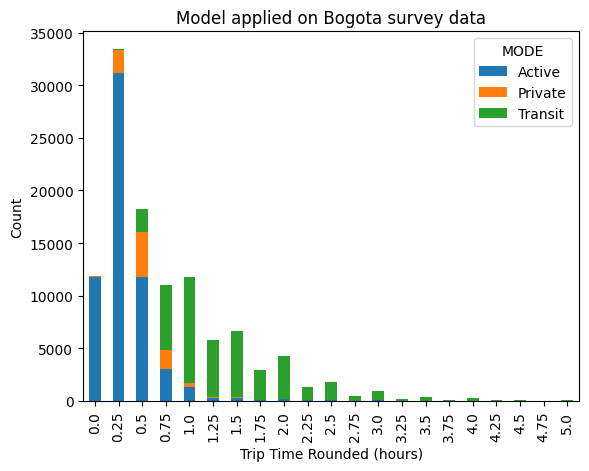

In [158]:
aa = Xy_raw_for_predict_5_less [['Trip_TravelTime_Length_hour','MODE']].copy()
aa['trip_time_rounded'] = (4 * aa['Trip_TravelTime_Length_hour']).round() / 4
bb = aa.groupby(['trip_time_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='trip_time_rounded', columns='MODE', values='Trip_TravelTime_Length_hour')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Time Rounded (hours)')
ax.set_ylabel('Count')

# Set the title of the chart
ax.set_title('Model applied on Bogota survey data')

# Show the chart
plt.show()

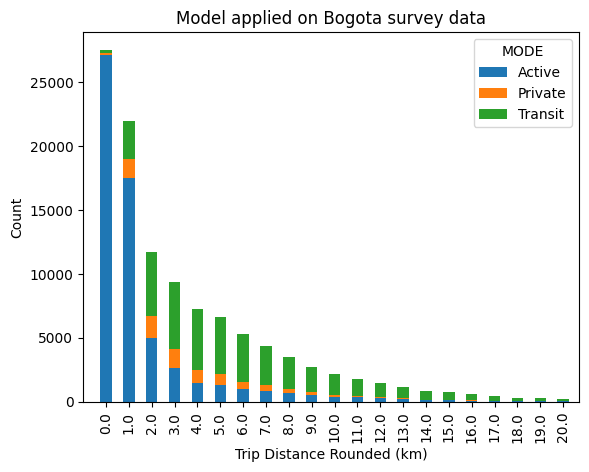

In [164]:
aa = Xy_raw_for_predict_5_less [['distance','MODE']].copy()
aa['distance_rounded'] = aa['distance'].copy().round()
bb = aa.groupby(['distance_rounded', 'MODE']).count().reset_index()
pivot_df = bb.pivot(index='distance_rounded', columns='MODE', values='distance')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Distance Rounded (km)')
ax.set_ylabel('Count')

ax.set_xlim([-1, 20.7])


# Set the title of the chart
ax.set_title('Model applied on Bogota survey data')

# Show the chart
plt.show()


